# Working in Japan
_What can we learn from OECD datasets about work in Japan? A simple jupyter/python notebook to discover it._

In [255]:
%matplotlib inline
import numpy as np
import pandas as pd
import pandasdmx as pdsdmx
import matplotlib
import requests

### Great resource explaining how to import OECD SDMX data with Panda
http://www.bondeconomics.com/2018/05/loading-oecd-data-with-python.html

In [256]:
oecd = pdsdmx.Request('OECD')
# data_response = oecd.data(resource_id='MEI_CLI', key='all?startTime=2018')
data_response = oecd.data(resource_id='ANHRS', key='all?startTime=2000')
avg_annual_hr_work_df = data_response.write(data_response.data.series, parse_time=False)

In [257]:
avg_annual_hr_work_df = avg_annual_hr_work_df.xs('TE', axis=1, level=1, drop_level=False)
avg_annual_hr_work_df = avg_annual_hr_work_df.reset_index()
headers_list = []
for headers in avg_annual_hr_work_df.columns:
    if (headers[0] == 'index'):
        headers_list.append('Year')
    else:
        headers_list.append(headers[0])
avg_annual_hr_work_df.columns = list(headers_list)
avg_annual_hr_work_df.set_index('Year', inplace=True, drop=True)
avg_annual_hr_work_subset_df = avg_annual_hr_work_df.filter(items=['JPN', 'OECD'])
year2018 = pd.DataFrame(avg_annual_hr_work_df.loc['2018'])
year2018 = year2018.sort_values(by=['2018'])
year2000 = pd.DataFrame(avg_annual_hr_work_df.loc['2000'])
year2000 = year2000.sort_values(by=['2000'])

Text(0, 0.5, 'Working hours')

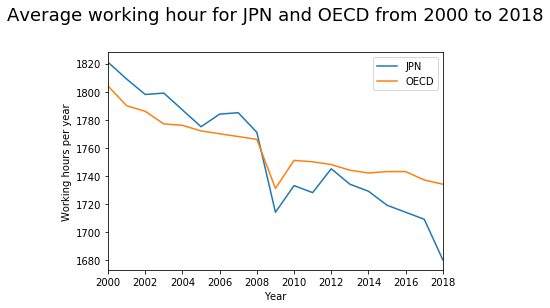

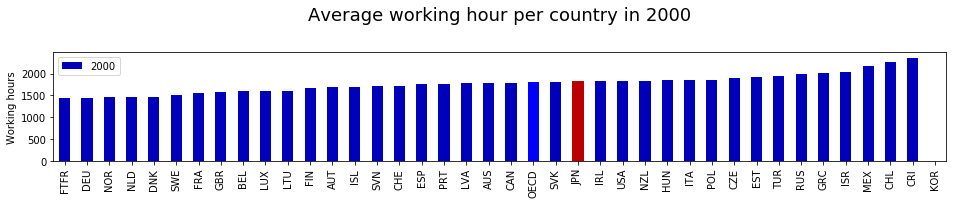

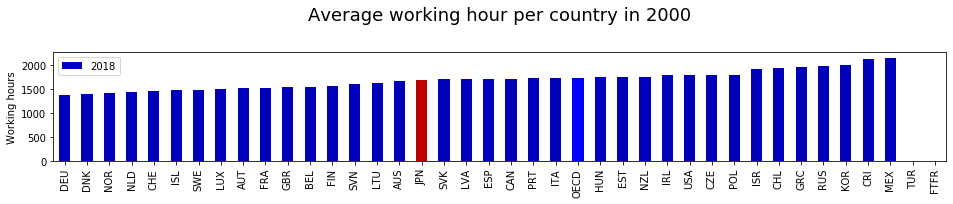

In [272]:
# Plot of average working hour for JPN and OECD from 2000 to 2018
avg_annual_hr_work_subset_plot = avg_annual_hr_work_subset_df.plot()
avg_annual_hr_work_subset_plot.set_title('Average working hour for JPN and OECD from 2000 to 2018', pad=32, fontdict = {'fontsize': 18,
 'fontweight' : 24})
avg_annual_hr_work_subset_plot.set_xlabel('Year')
avg_annual_hr_work_subset_plot.set_ylabel('Working hours per year')


#Plot of the average working hour per country in 2000
country_colors = [[]]
for country in year2000.index:
    if (country == "JPN"):
        country_colors[0].append('#BB0000')
    elif (country == "OECD"):
        country_colors[0].append('#0000FF')
    else:
        country_colors[0].append('#0000BB')
    
year2000_plot = year2000.plot(kind="bar", color=country_colors, figsize=(16,2))
year2000_plot.set_title('Average working hour per country in 2000', pad=32, fontdict = {'fontsize': 18,
 'fontweight' : 24})
year2000_plot.set_ylabel('Working hours')

#Plot of the average working hour per country in 2018
country_colors = [[]]
for country in year2018.index:
    if (country == "JPN"):
        country_colors[0].append('#BB0000')
    elif (country == "OECD"):
        country_colors[0].append('#0000FF')
    else:
        country_colors[0].append('#0000BB')
    
year2018_plot = year2018.plot(kind="bar", color=country_colors, figsize=(16,2))
year2018_plot.set_title('Average working hour per country in 2000', pad=32, fontdict = {'fontsize': 18,
 'fontweight' : 24})
year2018_plot.set_ylabel('Working hours')


A first surprise comes from the average amount of hour worked per year. Since 2009, Japanese people work less than the OECD average. Spanish people work more than Japanese people in 2018.